### Challenge 4 - Dimensionality Reduction

In [108]:
#1) Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import datasets
#Getting Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [109]:
data_cancer = pd.DataFrame(X)

#Bare nuclei has missing data
missing_data = data_cancer[data_cancer.isna().any(axis=1)]

#y is Class type target predictor
target_data = pd.DataFrame(y)
print(target_data)
# data_cancer.head()

#Get rid of missing data rows
data_cancer["Class"] = target_data
data_cancer_clean = data_cancer.dropna().reset_index(drop=True)
data_cancer_clean

     Class
0        2
1        2
2        2
3        2
4        2
..     ...
694      2
695      2
696      4
697      4
698      4

[699 rows x 1 columns]


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2.0,1,1,1,2
679,2,1,1,1,2,1.0,1,1,1,2
680,5,10,10,3,7,3.0,8,10,2,4
681,4,8,6,4,3,4.0,10,6,1,4


Text(0.5, 1.0, 'Visualizing Correlated Data Points to our Class')

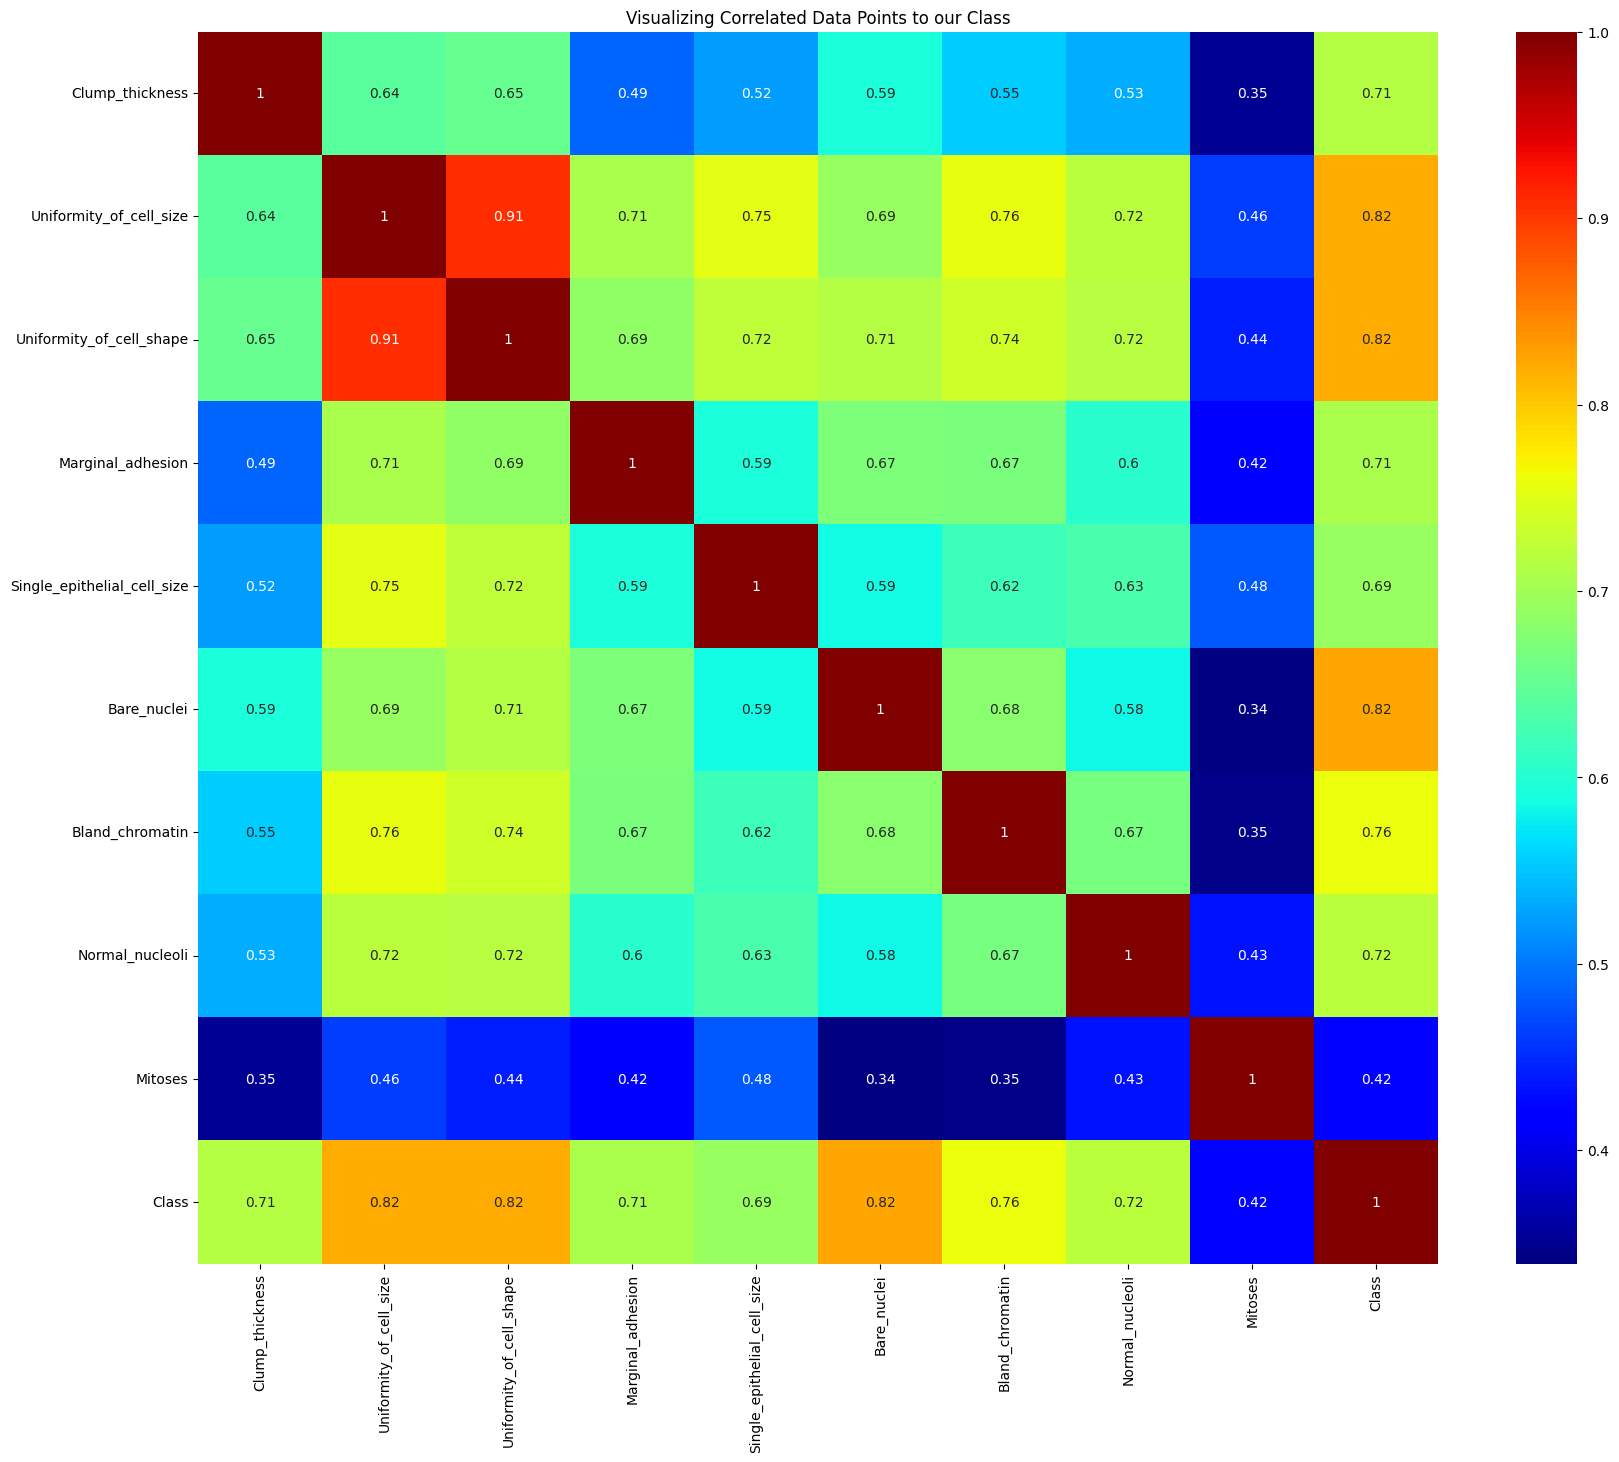

In [110]:
#2) Visualizing data to find correlated features

figure, axis = plt.subplots(figsize=(20,16))
sns.heatmap(data_cancer_clean[['Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses','Class']].corr(), annot=True,cmap='jet')

plt.title("Visualizing Correlated Data Points to our Class")

## Part 2 Remarks on Above Visualization:

### Clearly from this correlation plot, Mitosis is not correlated to our Class target, or really any data in our dataset. We will remove the Mitosis Feature

### Also we will be dropping Uniformity of cell size because it is highly correlated to the Uniformity of cell shape, the two features give very similar data results.

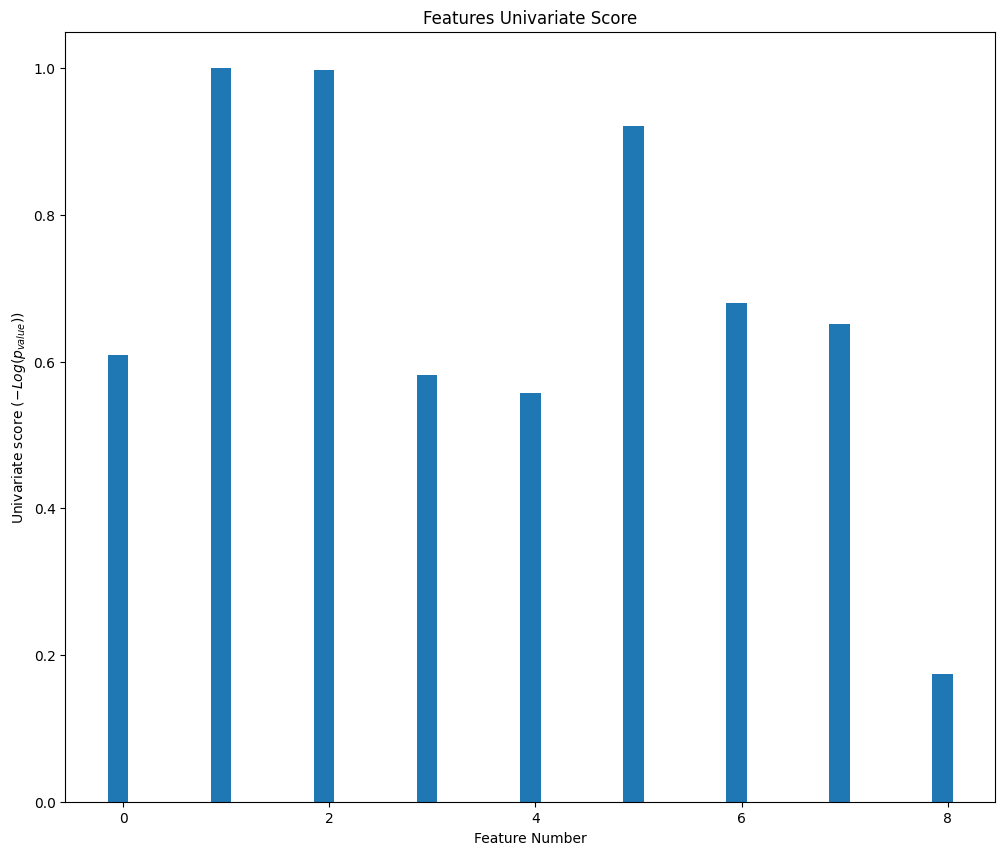

In [111]:
#Testing univariate feature selection
X = data_cancer_clean.drop(columns=['Class'])
y = data_cancer_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

#Select all 9 features to see which are the highest correlated
selector = SelectKBest(f_classif, k=9)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(12,10))
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Features Univariate Score")
plt.xlabel("Feature Number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()


### Our Univariate Score graph also verifyies our heatmap correlation graph, that the Uniformity of Cell Size, and Uniformity of Cell Shape are the highest corellated features for our target Classification. It also shows that Bare Nuclei is the 3rd highest correlated feature, which is also verified by our heatmap correlation graph. It also verifies again that Uniformity of Cell Size and Uniformity of Cell Shape give two very similar data correlations to the class. Thus, we will drop one (Cell Size). Based upon these two analysis (heatmap & univariate score), we will drop the following features: Mitoses, Single Epithelial Cell Size and Marginal Adhesion.

In [112]:
#Selecting best 2 Features:
data_cancer_clean = data_cancer_clean[['Clump_thickness','Uniformity_of_cell_shape','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Class']]
data_cancer_clean

,Clump_thickness,Uniformity_of_cell_shape,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Class
0,5,1,1.0,3,1,2
1,5,4,10.0,3,2,2
2,3,1,2.0,3,1,2
3,6,8,4.0,3,7,2
4,4,1,1.0,3,1,2
...,...,...,...,...,...,...
678,3,1,2.0,1,1,2
679,2,1,1.0,1,1,2
680,5,10,3.0,8,10,4
681,4,6,4.0,10,6,4


In [113]:
#3) Using Random Forest Algorithm to determine accuracy of Features

#Seperate features/target
X = data_cancer_clean.drop(columns=['Class'])
y = data_cancer_clean['Class']

#Split data in training/test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

#Get RF Classifier
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=20)

#Train RF
RF_classifier.fit(X_train, y_train)

#Make a prediction on test data
y_prediction = RF_classifier.predict(X_test)

#Find accuracy
accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print(f"Accuracy of Random Forest is {accuracy}")
print(f"Report Classification is: \n {report}")

Accuracy of Random Forest is 0.9562043795620438
Report Classification is: 
               precision    recall  f1-score   support

           2       0.99      0.95      0.97        99
           4       0.88      0.97      0.93        38

    accuracy                           0.96       137
   macro avg       0.94      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



# Part 3) Notes:
### Compared to the given accuracy/precision values from the Baseline of the dataset, our model is quite accurate. The expected precision values for the Random Forest is 95% which is right in the average of our precision value (99% for Class 2, 88% for Class 4). Our accuracy value compared to the baseline is also very near to what is expected (96.571% expected, 95.620% was found in the analysis). Our inaccuracy found in Class 4 is most likely due to the lack of support (38 data points for Class 4 compared to 99 data point for Class 2). If more data for Class 4 was given, this accuracy rating would most likely increase.

Text(0.5, 1.0, 'Feature Importance Using the Random Forest Classifier')

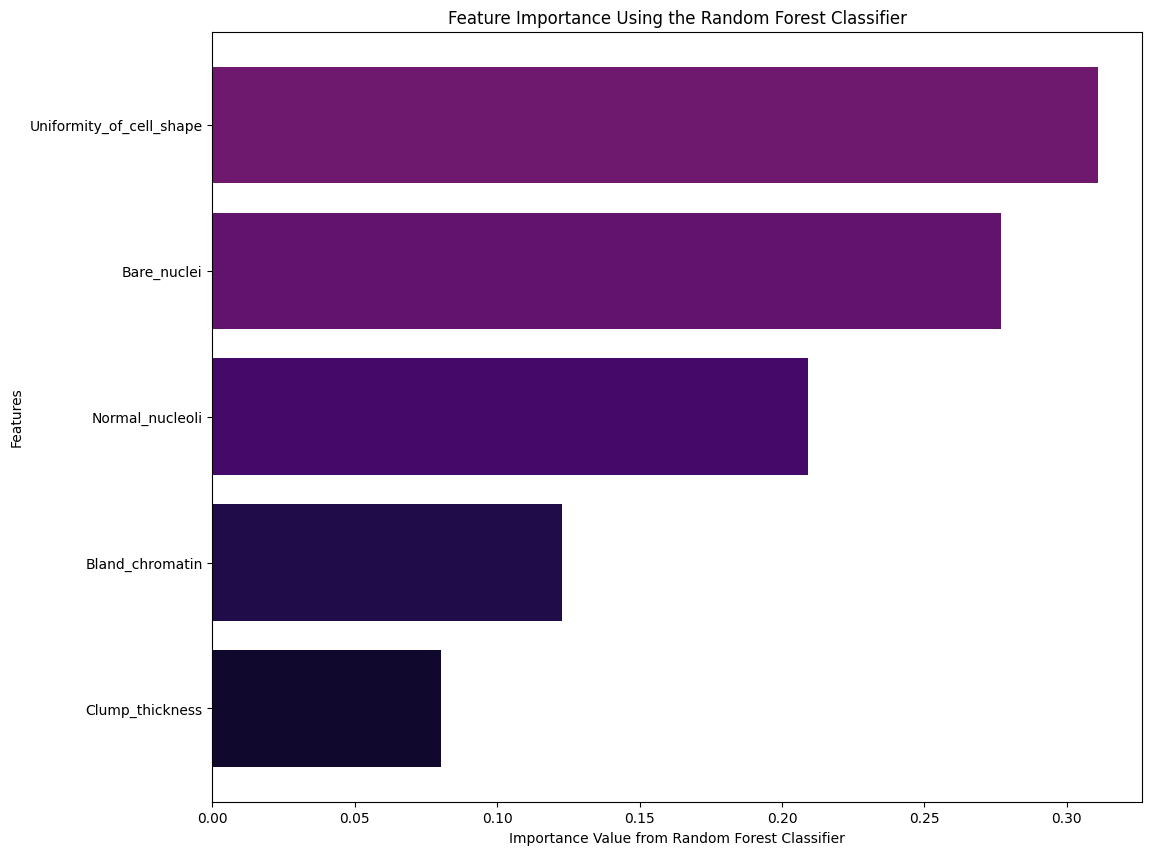

In [128]:
#4) Random Forest Classifier Importance rating of features plot
feature_importance_val = RF_classifier.feature_importances_

#Make dataframe to organize importance rating and sort in ascending order
feature_importance_df = pd.DataFrame({'Feature':X.columns, 'Importance':feature_importance_val}).sort_values(by='Importance')

plt.figure(figsize=(12,10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=plt.cm.inferno(feature_importance_df['Importance']))
plt.xlabel('Importance Value from Random Forest Classifier')
plt.ylabel('Features')
plt.title('Feature Importance Using the Random Forest Classifier')